### Linear Regression 

Linear regression is a statistical method used to model the relationship between a dependent variable 
𝑦
y and one or more independent variables 
𝑥
x. It's a foundational tool in data science and machine learning for predictive modeling, especially when trying to understand how a change in one or more predictors impacts an outcome.

Key Assumptions of Linear Regression

Linearity: The relationship between the independent and dependent variables is linear.

Independence: Observations are independent of each other.

Homoscedasticity: The variance of residuals is constant across all values of the independent variables.

Normality: The residuals of the model are normally distributed (mainly applies to small datasets).

###

"Using GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, and Research, a linear regression model was built to predict the Chance of Admit."

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_squared_error
from sklearn.linear_model import LinearRegression

### Reading the Datasets

In [10]:
data = pd.read_csv('Datasets/Admission_Predict.csv')
data

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Chance of Admit   
0           1              0.92  
1           1              0.76  
2           1              0.72  
3           1              0.80  
4           0              0.65  
..        ...               ...  
395         1              0.82  
396         1              0.84  
397         1              0.91  
398         0              0.67  
399         1              0.95  

[400 rows x 9 columns]

In [11]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

### Removing the Unwanted columns from Datasets

In [12]:
data=data.drop('Serial No.',axis=1)
data

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
395        324          110                  3  3.5   3.5  9.04         1   
396        325          107                  3  3.0   3.5  9.11         1   
397        330          116                  4  5.0   4.5  9.45         1   
398        312          103                  3  3.5   4.0  8.78         0   
399        333          117                  4  5.0   4.0  9.66         1   

     Chance of Admit   
0                0.92  
1                0.76  
2                0.72  
3                0.80  
4                0.65  
..                ...  
395              0.82  
396              0.84  
397              0.91  
398              0.67  
399              0.95  

[400 rows x 8 columns]

### Checking for NULL Values

In [13]:
data.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### Checking the Outliers for the 4 columns

In [15]:
column_names = ['GRE Score', 'TOEFL Score','CGPA',  'Chance of Admit ']

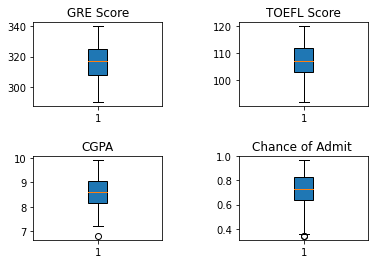

In [8]:
i=1

for col in column_names:
    plt.subplots_adjust(wspace=0.6,hspace=0.6)
    plt.subplot(2,2,i)
    i=i+1
    plt.boxplot(data[col],patch_artist=True)
    plt.title(col)

### Outliers are detected so removing it

In [16]:
outlier_columns = ['CGPA',  'Chance of Admit ']

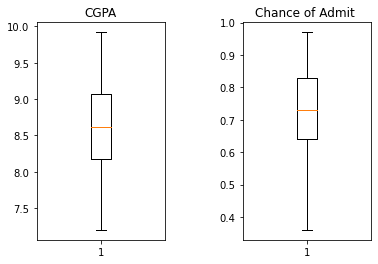

In [17]:
i=1

for col in outlier_columns:
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    
    IQR=Q3-Q1
    
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    upper_index=np.where(data[col] >= upper)[0]
    lower_index=np.where(data[col] <= lower)[0]
    
    data.drop(index= upper_index , inplace = True)
    data.drop(index= lower_index , inplace = True)
    
    plt.subplots_adjust(wspace=0.6,hspace=0.6)
    plt.subplot(1,2,i)
    i=i+1
    plt.boxplot(data[col])
    plt.title(col)
    
    data.reset_index(inplace=True)
    data.drop('index',axis=1,inplace=True)
    
    
    
    
    

### Find the corrletion b/w x and y

In [11]:
correlation=data.corr()
correlation

GRE Score  TOEFL Score  University Rating       SOP  \
GRE Score           1.000000     0.832714           0.665017  0.617055   
TOEFL Score         0.832714     1.000000           0.692325  0.662367   
University Rating   0.665017     0.692325           1.000000  0.737987   
SOP                 0.617055     0.662367           0.737987  1.000000   
LOR                 0.551700     0.561880           0.656381  0.731366   
CGPA                0.832176     0.827509           0.743450  0.726122   
Research            0.582542     0.490393           0.451432  0.446658   
Chance of Admit     0.799512     0.788195           0.710163  0.690864   

                       LOR       CGPA  Research  Chance of Admit   
GRE Score          0.551700  0.832176  0.582542          0.799512  
TOEFL Score        0.561880  0.827509  0.490393          0.788195  
University Rating  0.656381  0.743450  0.451432          0.710163  
SOP                0.731366  0.726122  0.446658          0.690864  
LOR                1.000000  0.664954  0.399051          0.667521  
CGPA               0.664954  1.000000  0.531951          0.872464  
Research           0.399051  0.531951  1.000000          0.561464  
Chance of Admit    0.667521  0.872464  0.561464          1.000000

Text(0, 0.5, 'chance')

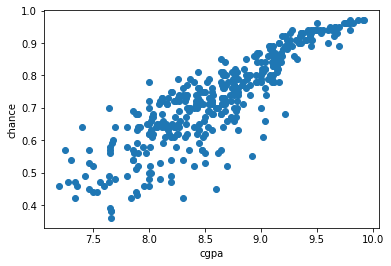

In [12]:
plt.scatter(data['CGPA'],data['Chance of Admit '])
plt.xlabel('cgpa')
plt.ylabel('chance')

In [13]:
x=data.drop('Chance of Admit ', axis = 1)

In [14]:
y=data['Chance of Admit ']

In [15]:
x

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0          337          118                  4  4.5   4.5  9.65         1
1          324          107                  4  4.0   4.5  8.87         1
2          316          104                  3  3.0   3.5  8.00         1
3          322          110                  3  3.5   2.5  8.67         1
4          314          103                  2  2.0   3.0  8.21         0
..         ...          ...                ...  ...   ...   ...       ...
392        324          110                  3  3.5   3.5  9.04         1
393        325          107                  3  3.0   3.5  9.11         1
394        330          116                  4  5.0   4.5  9.45         1
395        312          103                  3  3.5   4.0  8.78         0
396        333          117                  4  5.0   4.0  9.66         1

[397 rows x 7 columns]

In [16]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
392    0.82
393    0.84
394    0.91
395    0.67
396    0.95
Name: Chance of Admit , Length: 397, dtype: float64

### Spliting the data into train and test

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=120)

In [18]:
x_train.shape, x_test.shape

((317, 7), (80, 7))

In [19]:
y_train.shape, y_test.shape

((317,), (80,))

### Creating the model and training the model

In [22]:
model=LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [23]:
model.coef_

array([0.00164013, 0.00248014, 0.00136407, 0.00286304, 0.02114475,
       0.12744117, 0.01799747])

In [24]:
model.intercept_

-1.253837854670738

### Test Score

In [27]:
model.score(x_test,y_test)  

0.8003206753683428

### Training Score

In [28]:
model.score(x_train,y_train)

0.8011408085850424

### Prediction

In [29]:
y_pred=model.predict(x_test)

In [31]:
pd.DataFrame({'True Value' : y_test ,'Predicted Value' : y_pred })

True Value  Predicted Value
185        0.93         0.903014
374        0.47         0.481216
304        0.79         0.816001
19         0.62         0.656892
202        0.69         0.682374
..          ...              ...
336        0.81         0.778463
53         0.72         0.675380
313        0.65         0.611026
396        0.95         0.935930
249        0.70         0.730266

[80 rows x 2 columns]

In [32]:
mean_absolute_error(y_test,y_pred)

0.047409524959957546

In [33]:
mean_squared_error(y_test,y_pred)

0.00417917594492048

In [34]:
model.predict([[270,98,3,2,3,7.6,0]])

C:\Users\gkcha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.47385521])

In [35]:
model.predict([[320,120,5,6,4,9.6,1]])

C:\Users\gkcha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.91862944])

In [36]:
model.predict([[150,50,3,2,3,7.6,0]])

C:\Users\gkcha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.15799344])

### saving the model

In [38]:
import joblib

In [39]:
joblib.dump(model,'ir_model')

['ir_model']

In [40]:
model_reloaded = joblib.load('ir_model')

In [43]:
model_reloaded.predict([[150,50,3,2,3,7.6,0]])

C:\Users\gkcha\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.15799344])